In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy import stats
import statsmodels.api as sm
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM, SVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from pyod.models.copod import COPOD


# Define the path to the dataset
file_path = 'Dataset4_EWS.xlsx'


Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


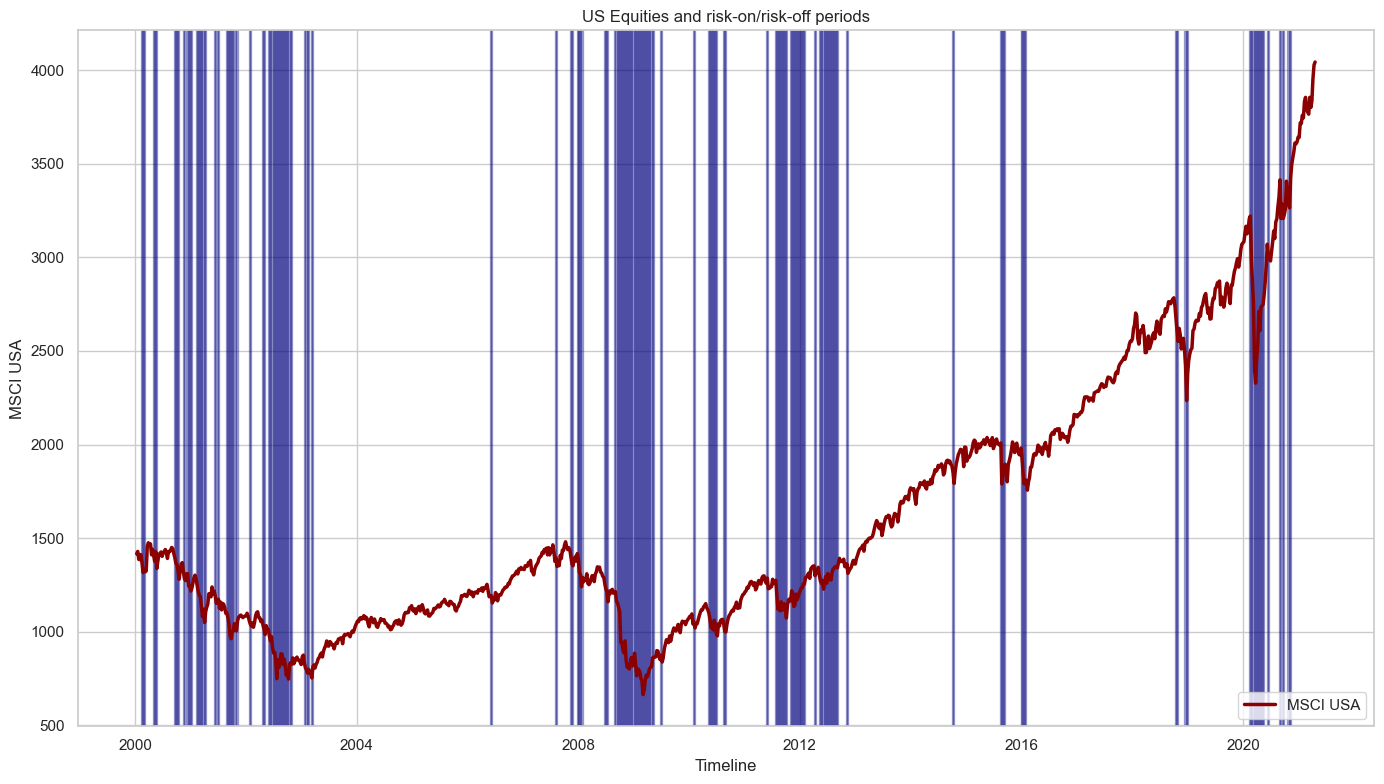

In [6]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(file_path, sheet_name='Markets')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

# Create a plot with anomalies as vertical bars and MXUS as a line
if y_col and 'MXUS' in X_df.columns:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot MXUS line
    ax.plot(X_df.index, X_df['MXUS'], color='darkred', linewidth=2.5, label='MSCI USA')

    # Get the y-axis limits after plotting MXUS
    y_min, y_max = ax.get_ylim()

    # For each anomaly point (Y=1), create a vertical span across the entire plot
    for i, (date, is_anomaly) in enumerate(zip(X_df.index, y)):
        if is_anomaly == 1:
            ax.axvspan(date, date + pd.Timedelta(days=7), alpha=0.3, color='navy', label='Risk-on/Risk-off' if i == 0 else "")

    # Set labels and title
    ax.set_xlabel('Timeline')
    ax.set_ylabel('MSCI USA')
    ax.set_title('US Equities and risk-on/risk-off periods')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Either 'Y' column or 'MXUS' column is missing in the dataset.")


In [7]:
# Make data stationary based on variable type
# So w define lists of variables by type
indices_currencies = [col for col in X_df.columns if col in [
    'XAUBGNL', 'BDIY', 'CRY', 'Cl1', 'DXY', 'EMUSTRUU', 'GBP', 'JPY', 'LF94TRUU',
    'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU',
    'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'VIX'
]]

interest_rates = [col for col in X_df.columns if col in [
    'EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y',
    'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR',
    'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR'
]]

# Create a new dataframe for stationary data
stationary_df = pd.DataFrame(index=X_df.index[1:])

# Apply log-differences to indices and currencies (always positive)
for col in indices_currencies:
    if col in X_df.columns:
        stationary_df[col] = np.diff(np.log(X_df[col]))

# Apply first differences to interest rates (can be negative or very close to 0)
for col in interest_rates:
    if col in X_df.columns: 
        stationary_df[col] = np.diff(X_df[col])

# Keep Bloomberg Economic US Surprise Index as is (already stationary)
if 'ECSURPUS' in X_df.columns:
    stationary_df['ECSURPUS'] = X_df['ECSURPUS'].values[1:]

# Adjust the response variable to match the new data length
if y is not None:
    y_stationary = y[1:]
else:
    y_stationary = None


In [8]:
# Step 1: shuffle and split data into training, validation, and test sets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate


# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# Convert to numpy arrays for easier manipulation
X = stationary_df.values
y = y_stationary


total = len(X)
normal_count = np.sum(y == 0)
anomaly_count = np.sum(y == 1)
normal_pct = np.mean(y == 0) * 100
anomaly_pct = np.mean(y == 1) * 100

rows = [
    ["Total records", total, ""],
    ["Normal",        normal_count, f"{normal_pct:.2f}%"],
    ["Anomalies",     anomaly_count, f"{anomaly_pct:.2f}%"]
]

print(tabulate(rows, headers=[" ","Count","Percentage"], tablefmt="github"))
print("\n\n")


# Step 1: Creating training/cross-validation/test set with reshuffling

# Reshuffle the data (this will break down autocorrelation)
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# Separate normal and anomalous examples
X_normal = X_shuffled[y_shuffled == 0]
X_anomaly = X_shuffled[y_shuffled == 1]

# Calculate sizes for each set
n_normal = X_normal.shape[0]
n_anomaly = X_anomaly.shape[0]

# Training set: 80% of normal examples
train_size = int(0.8 * n_normal)
X_train = X_normal[:train_size]

# Cross-validation set: 10% of normal examples and 50% of anomalies
cv_normal_size = int(0.1 * n_normal)
cv_anomaly_size = int(0.5 * n_anomaly)
X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
X_cv_anomaly = X_anomaly[:cv_anomaly_size]
X_cross_val = np.vstack((X_cv_normal, X_cv_anomaly))
y_cross_val = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))

# Test set: 10% of normal examples and 50% of anomalies
X_test_normal = X_normal[train_size + cv_normal_size:]
X_test_anomaly = X_anomaly[cv_anomaly_size:]
X_test = np.vstack((X_test_normal, X_test_anomaly))
y_test = np.hstack((np.zeros(len(X_test_normal)), np.ones(len(X_test_anomaly))))

# We'll standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cross_val = scaler.transform(X_cross_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} (all normal)")
print(f"Cross-validation set size: {X_cross_val.shape[0]} ({cv_normal_size} normal, {cv_anomaly_size} anomalies)")
print(f"Test set size: {X_test.shape[0]} ({len(X_test_normal)} normal, {len(X_test_anomaly)} anomalies)")


|               |   Count | Percentage   |
|---------------|---------|--------------|
| Total records |    1110 |              |
| Normal        |     873 | 78.65%       |
| Anomalies     |     237 | 21.35%       |



Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)


In [17]:

import umap
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # needed to register the 3D proj

# 1) classification helper
def get_categories(y_true, y_pred):
    cats = np.full(len(y_true), 'Unknown', dtype=object)
    cats[(y_true==0)&(y_pred==0)] = 'True Negative'
    cats[(y_true==0)&(y_pred==1)] = 'False Positive'
    cats[(y_true==1)&(y_pred==0)] = 'False Negative'
    cats[(y_true==1)&(y_pred==1)] = 'True Positive'
    return cats

# 2) shared style maps
CATEGORY_COLORS = {
    'True Negative': 'gray',
    'False Positive': 'red',
    'False Negative': 'blue',
    'True Positive': 'black'
}
CATEGORY_ALPHAS = {
    'True Negative': 0.3,
    'False Positive': 0.8,
    'False Negative': 0.8,
    'True Positive': 0.5
}
CATEGORY_SIZES = {
    'True Negative': 30,
    'False Positive': 80,
    'False Negative': 80,
    'True Positive': 40
}

# ─────────────────────────────────────────────────────────────────────────────
# 📊  Precision–Recall (unchanged, since it's a curve)
# ─────────────────────────────────────────────────────────────────────────────
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall(y_true, y_score, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    ap = average_precision_score(y_true, y_score)
    plt.figure(figsize=(8,6))
    plt.plot(recall, precision, lw=2, label=f'AP = {ap:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision–Recall Curve — {model_name}')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# ─────────────────────────────────────────────────────────────────────────────
# 📈  Score histogram (now split into TP/FP/TN/FN)
# ─────────────────────────────────────────────────────────────────────────────
def plot_score_histogram(y_true, y_pred, y_score, model_name):
    cats = get_categories(y_true, y_pred)
    plt.figure(figsize=(8,6))
    for cat in ['True Negative','False Positive','False Negative','True Positive']:
        mask = (cats == cat)
        if not mask.any(): 
            continue
        plt.hist(
            y_score[mask],
            bins=50,
            density=True,
            alpha=CATEGORY_ALPHAS[cat],
            color=CATEGORY_COLORS[cat],
            label=f'{cat} (n={mask.sum()})'
        )
    plt.xlabel('Anomaly Score')
    plt.title(f'Score Distribution — {model_name}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ─────────────────────────────────────────────────────────────────────────────
# 🗺️  2D UMAP projection (now with categories)
# ─────────────────────────────────────────────────────────────────────────────
def plot_umap(X, y_true, y_pred, model_name):
    cats = get_categories(y_true, y_pred)
    proj = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(X)
    plt.figure(figsize=(10,8))
    for cat in ['True Negative','False Positive','False Negative','True Positive']:
        mask = (cats == cat)
        if not mask.any():
            continue
        plt.scatter(
            proj[mask,0], proj[mask,1],
            c=CATEGORY_COLORS[cat],
            alpha=CATEGORY_ALPHAS[cat],
            s=CATEGORY_SIZES[cat],
            label=f'{cat} (n={mask.sum()})'
        )
    plt.title(f'UMAP Projection — {model_name}')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(loc='best', fontsize='small', framealpha=0.7)
    plt.tight_layout()
    plt.show()

# ─────────────────────────────────────────────────────────────────────────────
# 🎲  3D t-SNE projection (with categories)
# ─────────────────────────────────────────────────────────────────────────────
def plot_tsne3d(X, y_true, y_pred, model_name):
    cats = get_categories(y_true, y_pred)
    tsne = TSNE(n_components=3, random_state=42, init='random', learning_rate='auto')
    X3 = tsne.fit_transform(X)
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111, projection='3d')
    for cat in ['True Negative','False Positive','False Negative','True Positive']:
        mask = (cats == cat)
        if not mask.any():
            continue
        ax.scatter(
            X3[mask,0], X3[mask,1], X3[mask,2],
            color=CATEGORY_COLORS[cat],
            marker='o' if 'Negative' in cat else 'x',
            s=CATEGORY_SIZES[cat],
            alpha=CATEGORY_ALPHAS[cat],
            label=f'{cat} (n={mask.sum()})'
        )
    ax.set_title(f'3D t-SNE Projection — {model_name}')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')
    ax.legend(loc='best', fontsize='small')
    plt.tight_layout()
    plt.show()


In [18]:
def evaluate_model(y_true, y_pred, y_score, model_name):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"\n{model_name} Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomaly'],
                yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    if y_score is not None:  # Some models don't provide probability scores
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()
    
    # PR curve
    plot_precision_recall(y_test, y_score, model_name)

    # Score hist by TP/FP/TN/FN
    plot_score_histogram(y_test, y_pred, y_score, model_name)

    # 2D UMAP with categories
    plot_umap(X_test, y_test, y_pred, model_name)

    # 3D t-SNE with categories
    plot_tsne3d(X_test, y_test, y_pred, model_name)

    return precision, recall, f1

# Function to visualize results in PCA space
def visualize_pca(X, y_true, y_pred, model_name):
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['Actual'] = y_true
    pca_df['Predicted'] = y_pred

    # Create classification categories
    pca_df['Category'] = 'Unknown'
    pca_df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
    pca_df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
    pca_df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
    pca_df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'

    # Calculate explained variance
    explained_variance = pca.explained_variance_ratio_
    total_variance = sum(explained_variance)

    # Plot
    plt.figure(figsize=(12, 8))

    # Define colors and sizes
    colors = {'True Negative': 'gray', 'True Positive': 'black',
              'False Positive': 'red', 'False Negative': 'blue'}
    alphas = {'True Negative': 0.3, 'True Positive': 0.5,
              'False Positive': 0.8, 'False Negative': 0.8}
    sizes = {'True Negative': 30, 'True Positive': 40,
             'False Positive': 80, 'False Negative': 80}

    # Plot each category
    for category, group in pca_df.groupby('Category'):
        plt.scatter(group['PC1'], group['PC2'],
                    color=colors[category],
                    alpha=alphas[category],
                    s=sizes[category],
                    label=f"{category} ({len(group)})")

    plt.title(f'PCA projection - {model_name}\nExplained variance: {total_variance:.2%}', fontsize=16)
    plt.xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=14)
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Store results for comparison
results = []


In [19]:
# ----------------------------------------------------------------------------------
# ⬇️  ENSEMBLE  ⬇️
# ----------------------------------------------------------------------------------
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
import torch.optim as optim
import torch

# Calculate contamination from cross-validation set
raw_contamination = np.mean(y_cross_val)
print(f"\nEstimated contamination from cross-validation set: {raw_contamination:.4f}")

# Cap contamination for algorithms that have limits
contam = min(raw_contamination, 0.5)
print(f"Using capped contamination value: {contam:.4f}")



print("\n" + "="*60)
print("TRAINING INDIVIDUAL DETECTORS FOR THE ENSEMBLE")
print("="*60)

# ----------------------------------------------------------------------
# 1) ‑‑‑ Autoencoder ----------------------------------------------------
# ----------------------------------------------------------------------

np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).to(device)
X_cv_tensor = torch.FloatTensor(X_cross_val).to(device)
X_test_tensor = torch.FloatTensor(X_test).to(device)

# Create DataLoaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)  # Input = Output for autoencoder
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=16):
        super(Autoencoder, self).__init__()

        # Calculate layer sizes for a gradually decreasing architecture
        layer1_size = input_dim // 2
        layer2_size = layer1_size // 2

        # Ensure minimum size
        layer1_size = max(layer1_size, encoding_dim * 2)
        layer2_size = max(layer2_size, encoding_dim)

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, layer1_size),
            nn.BatchNorm1d(layer1_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer1_size, layer2_size),
            nn.BatchNorm1d(layer2_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer2_size, encoding_dim),
            nn.BatchNorm1d(encoding_dim),
            nn.ReLU(True)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, layer2_size),
            nn.BatchNorm1d(layer2_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer2_size, layer1_size),
            nn.BatchNorm1d(layer1_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer1_size, input_dim),
            nn.Tanh()  # Output activation to match standardized data range
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def encode(self, x):
        return self.encoder(x)

# Get input dimension from data
input_dim = X_train.shape[1]
print(f"Input dimension: {input_dim}")

# Create the autoencoder model
encoding_dim = min(16, input_dim // 4)  # Adjust encoding dimension based on input size
model = Autoencoder(input_dim, encoding_dim).to(device)
print(f"Encoding dimension: {encoding_dim}")
print(model)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training function
def train_autoencoder(model, train_loader, num_epochs=100, patience=10):
    # For early stopping
    best_loss = float('inf')
    no_improve_epochs = 0

    # For plotting
    train_losses = []

    print("Training autoencoder...")
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for data, _ in train_loader:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, data)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * data.size(0)

        # Calculate epoch loss
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.6f}')

        # Early stopping
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            no_improve_epochs = 0
            # Save the best model
            torch.save(model.state_dict(), 'best_autoencoder.pth')
        else:
            no_improve_epochs += 1
            if no_improve_epochs >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break


# Function to compute reconstruction error
def compute_reconstruction_error(model, data_tensor):
    model.eval()
    with torch.no_grad():
        reconstructions = model(data_tensor)
        # Compute MSE for each sample
        mse = ((reconstructions - data_tensor) ** 2).mean(dim=1).cpu().numpy()
    return mse


# Train the autoencoder
train_autoencoder(model, train_loader, num_epochs=100, patience=20)

# ─── Compute reconstruction errors ─────────────────────────────────────
# these three names feed directly into your ensemble stacking step
ae_train_scores = compute_reconstruction_error(model, X_train_tensor)
ae_cv_scores    = compute_reconstruction_error(model, X_cv_tensor)
ae_test_scores  = compute_reconstruction_error(model, X_test_tensor)

print(f"AE  CV-error mean:  {ae_cv_scores.mean():.6f}")
print(f"AE Test-error mean:{ae_test_scores.mean():.6f}")


Estimated contamination from cross-validation set: 0.5756
Using capped contamination value: 0.5000

TRAINING INDIVIDUAL DETECTORS FOR THE ENSEMBLE
Using device: cpu
Input dimension: 42
Encoding dimension: 10
Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=42, out_features=21, bias=True)
    (1): BatchNorm1d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=21, out_features=10, bias=True)
    (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affi


Isolation Forest Performance:
Precision: 0.6861
Recall: 0.7899
F1 Score: 0.7344


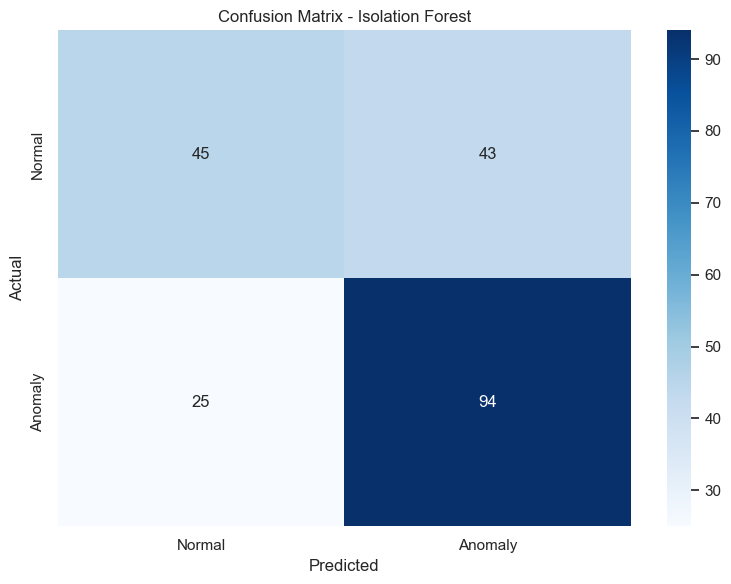

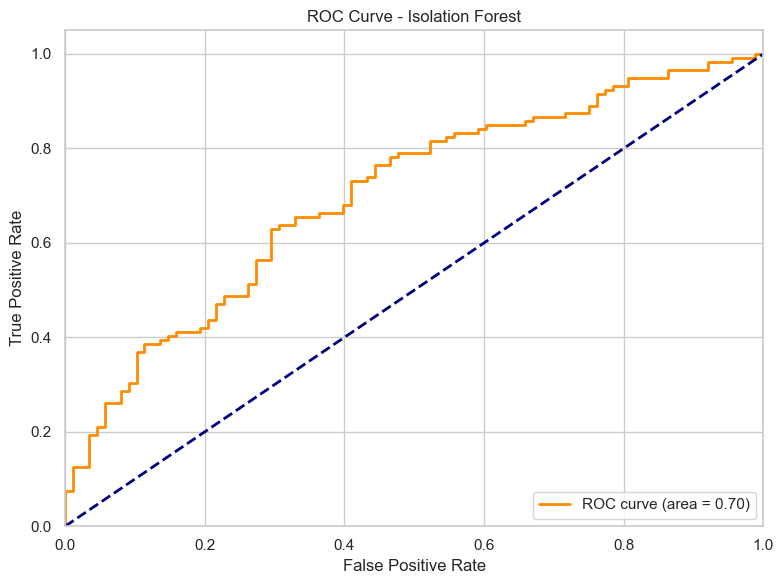

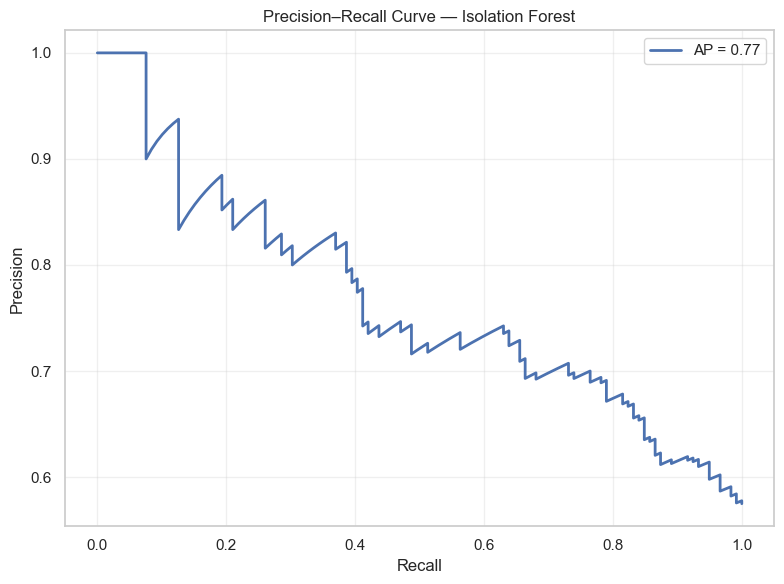

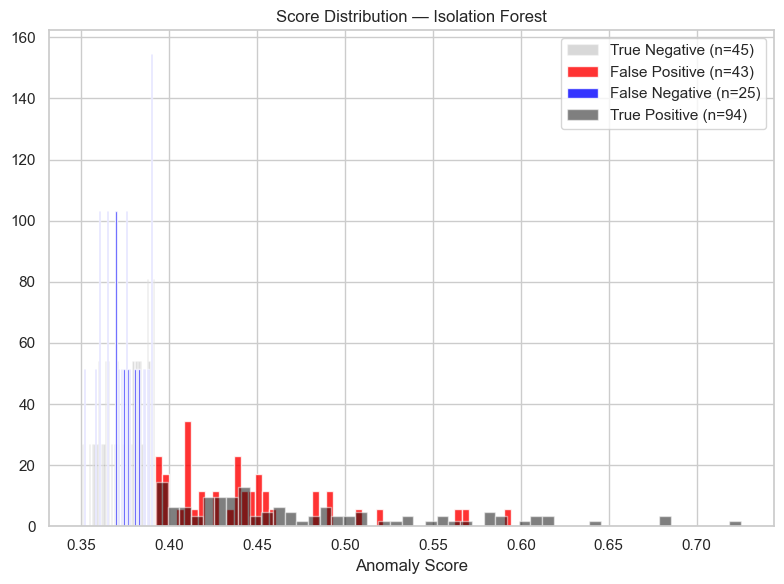

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


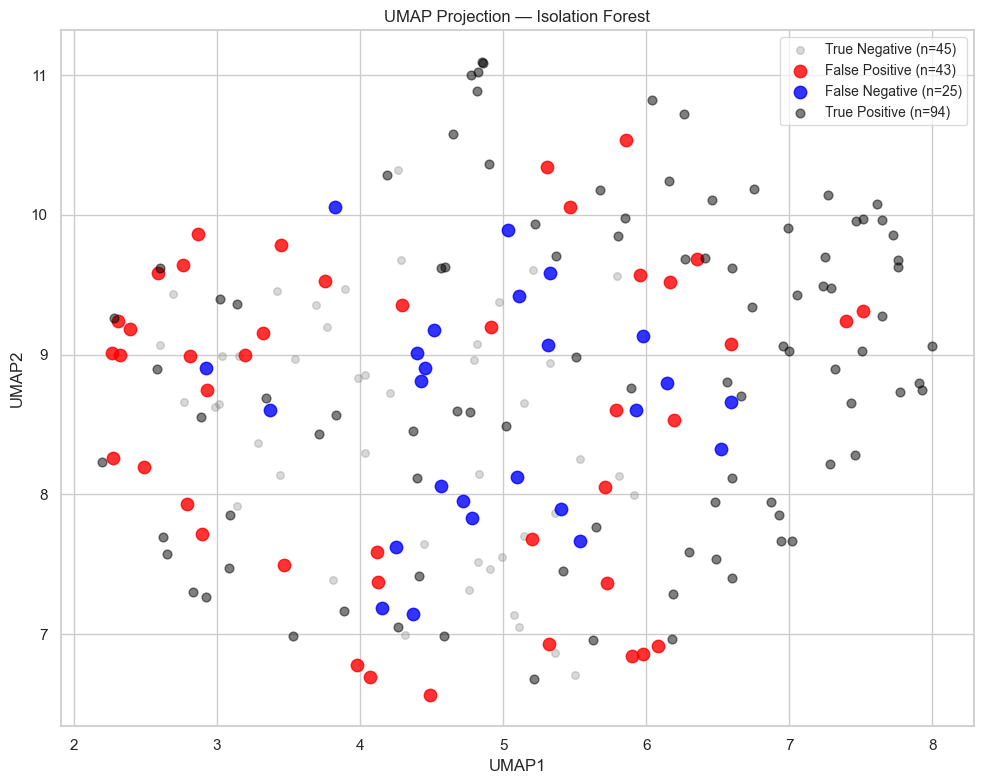

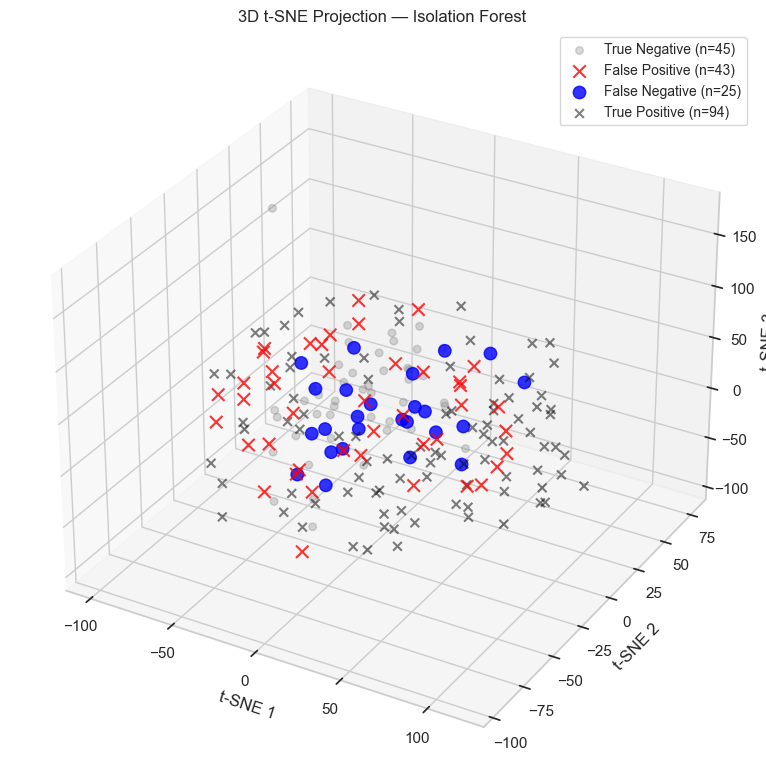

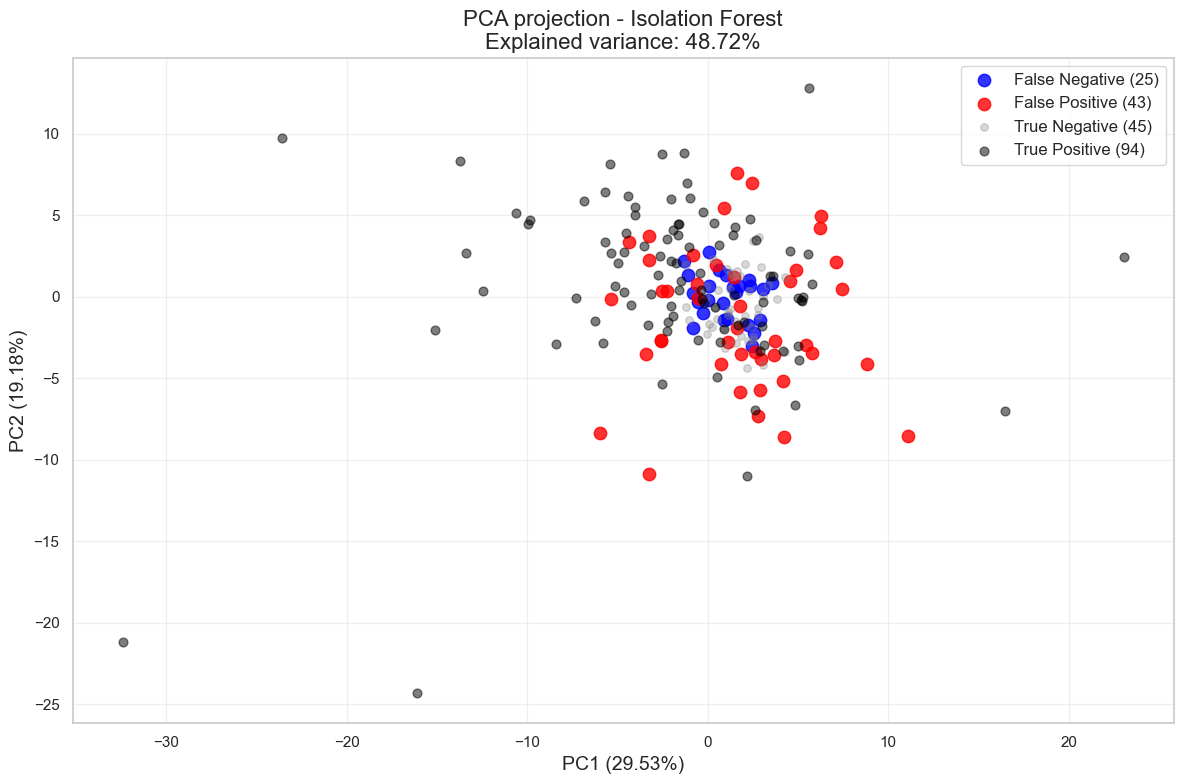

In [20]:
# ----------------------------------------------------------------------
# 2) ‑‑‑ Isolation Forest ----------------------------------------------
# ----------------------------------------------------------------------
iso = IsolationForest(
        n_estimators=300,
        contamination=contam,   # same contamination heuristic
        random_state=42)
iso.fit(X_train)

iso_cv_scores   = -iso.score_samples(X_cross_val)   # higher = more anomalous
iso_test_scores = -iso.score_samples(X_test)

# Isolation Forest predictions (–1 = anomaly)
iso_pred = (iso.predict(X_test) == -1).astype(int)
precision_if, recall_if, f1_if = evaluate_model(
    y_true=y_test,
    y_pred=iso_pred,
    y_score=iso_test_scores,
    model_name='Isolation Forest'
)
visualize_pca(
    X=X_test,
    y_true=y_test,
    y_pred=iso_pred,
    model_name='Isolation Forest'
)
results.append({
    'Model':   'Isolation Forest',
    'Precision': precision_if,
    'Recall':    recall_if,
    'F1':        f1_if
})



Local Outlier Factor Performance:
Precision: 0.6735
Recall: 0.8319
F1 Score: 0.7444


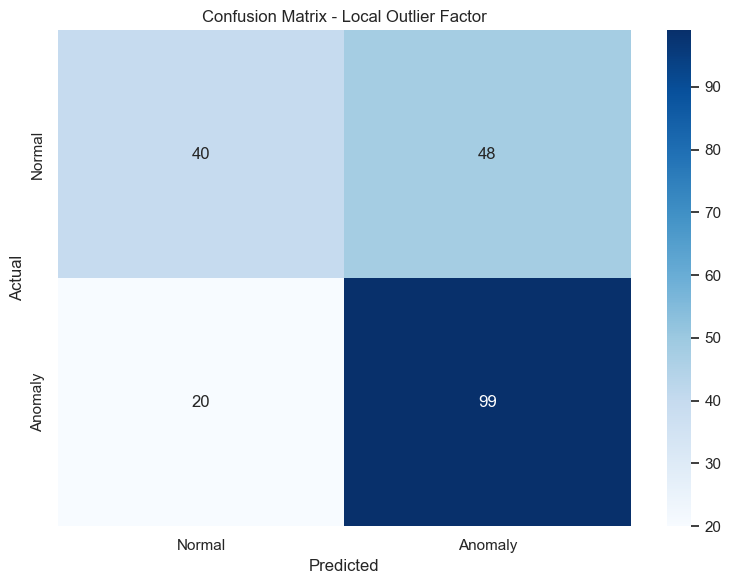

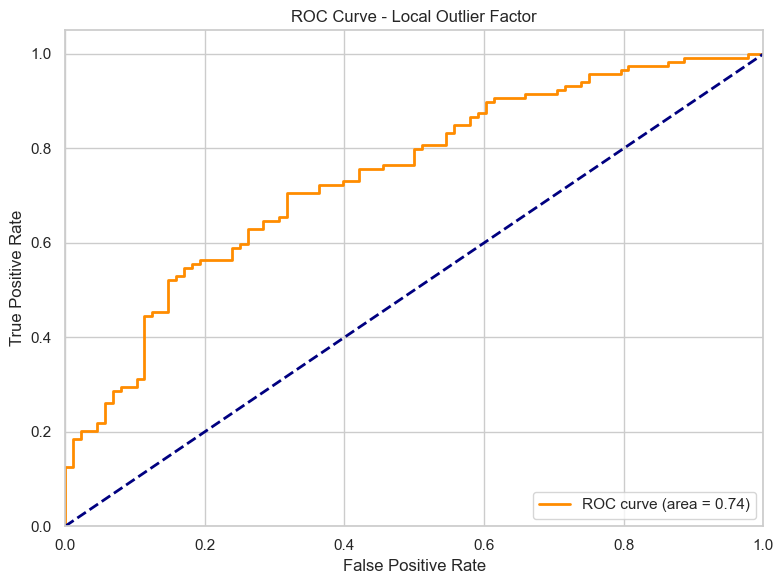

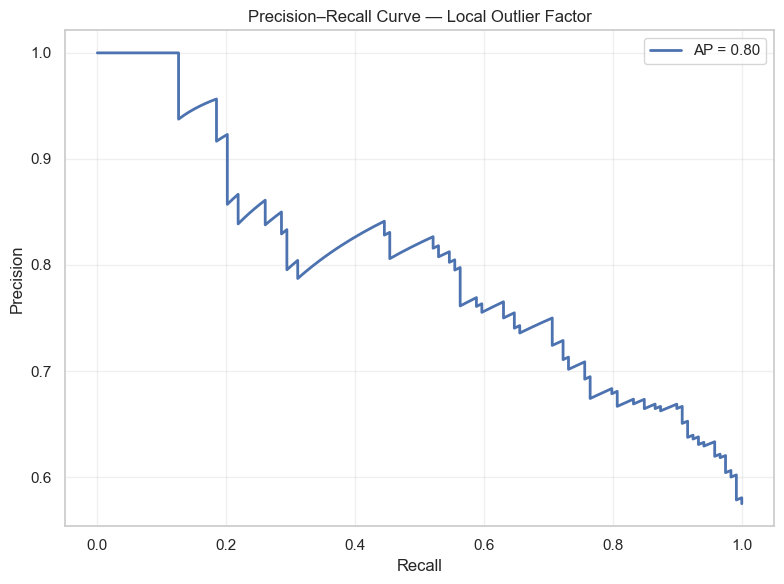

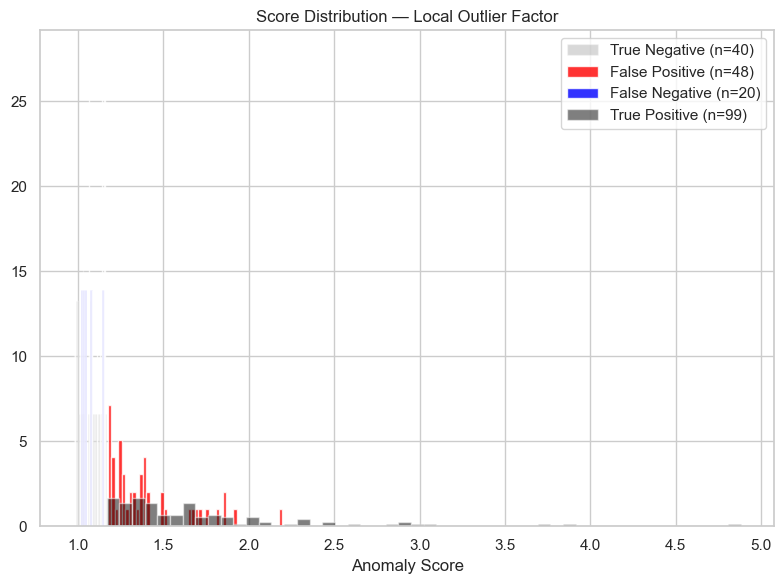

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


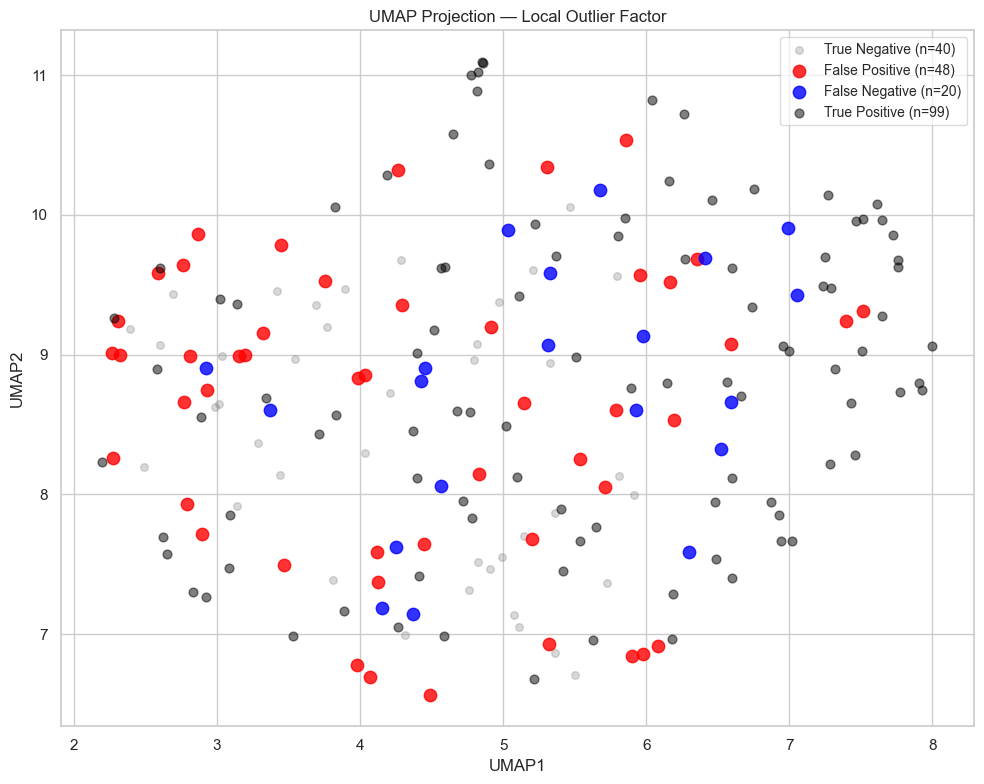

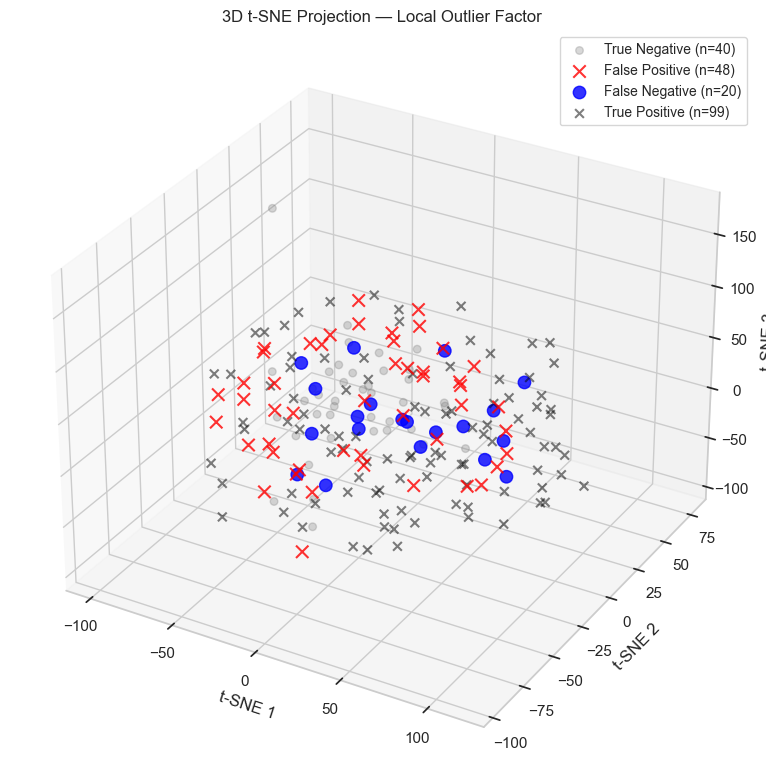

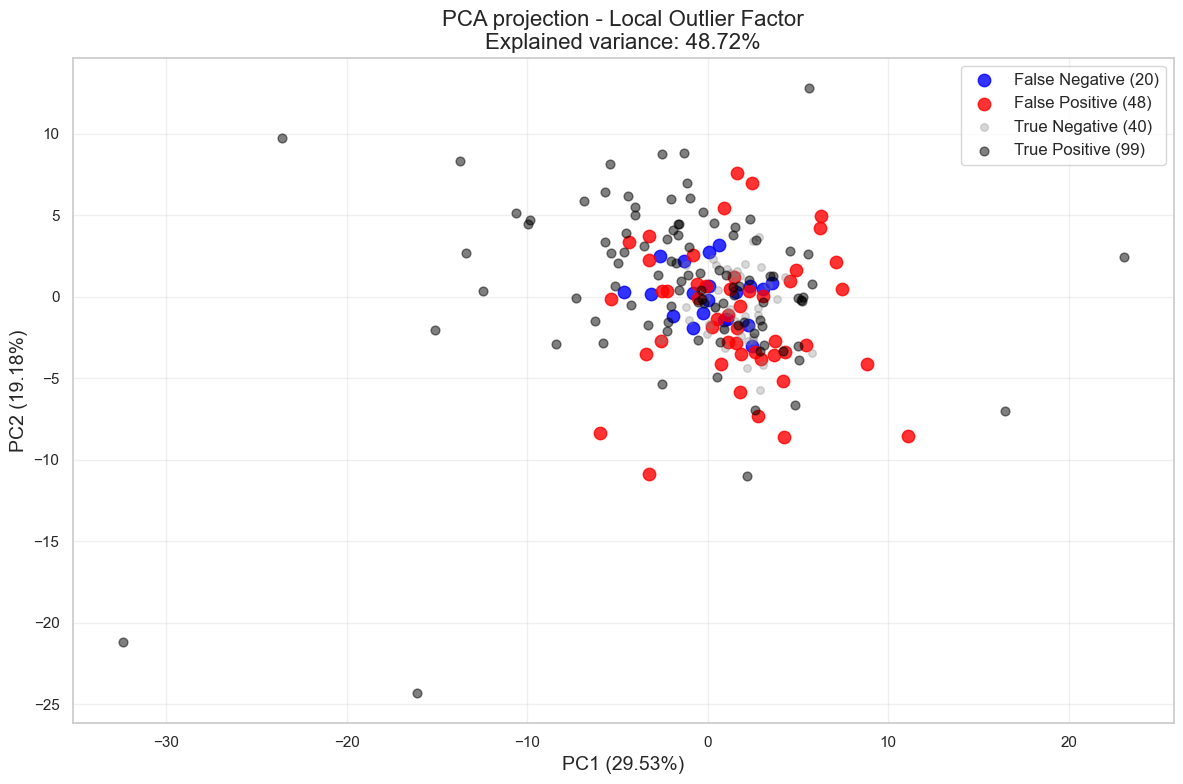

In [21]:
# ----------------------------------------------------------------------
# 3) ‑‑‑ Local Outlier Factor (fit_predict on train only normals) -------
# ----------------------------------------------------------------------
lof = LocalOutlierFactor(
        n_neighbors=20,
        novelty=True,
        contamination=contam)
lof.fit(X_train)

lof_cv_scores   = -lof.score_samples(X_cross_val)
lof_test_scores = -lof.score_samples(X_test)


# Local Outlier Factor predictions (–1 = anomaly)
lof_pred = (lof.predict(X_test) == -1).astype(int)
precision_lof, recall_lof, f1_lof = evaluate_model(
    y_true=y_test,
    y_pred=lof_pred,
    y_score=lof_test_scores,
    model_name='Local Outlier Factor'
)
visualize_pca(
    X=X_test,
    y_true=y_test,
    y_pred=lof_pred,
    model_name='Local Outlier Factor'
)
results.append({
    'Model':   'Local Outlier Factor',
    'Precision': precision_lof,
    'Recall':    recall_lof,
    'F1':        f1_lof
})

In [22]:
# ----------------------------------------------------------------------
# 4) ‑‑‑ Score normalisation & ensemble --------------------------------
# ----------------------------------------------------------------------
all_cv   = np.vstack([ae_cv_scores,  iso_cv_scores,  lof_cv_scores ]).T
all_test = np.vstack([ae_test_scores, iso_test_scores, lof_test_scores]).T

sc_norm  = MinMaxScaler()                       # scale each detector 0‑1
all_cv_n   = sc_norm.fit_transform(all_cv)
all_test_n = sc_norm.transform(all_test)

ensemble_cv_scores   = all_cv_n.mean(axis=1)    # simple average
ensemble_test_scores = all_test_n.mean(axis=1)

# choose threshold on CV set that matches contamination
contamination = np.mean(y_cross_val)
thr = np.percentile(ensemble_cv_scores, 100*(1-contamination))
print(f"Chosen threshold (CV‑based) = {thr:.6f}")

y_test_pred = (ensemble_test_scores > thr).astype(int)

Chosen threshold (CV‑based) = 0.098644



Ensemble (AE + IF + LOF) Performance:
Precision: 0.7155
Recall: 0.6975
F1 Score: 0.7064


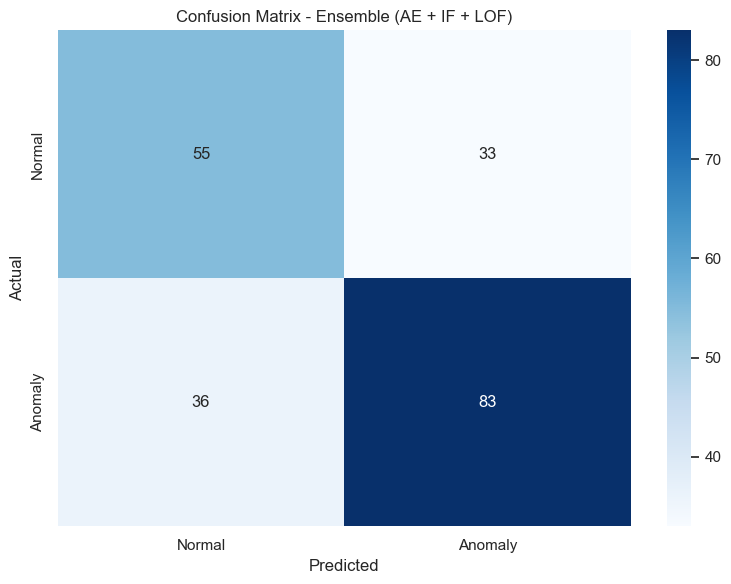

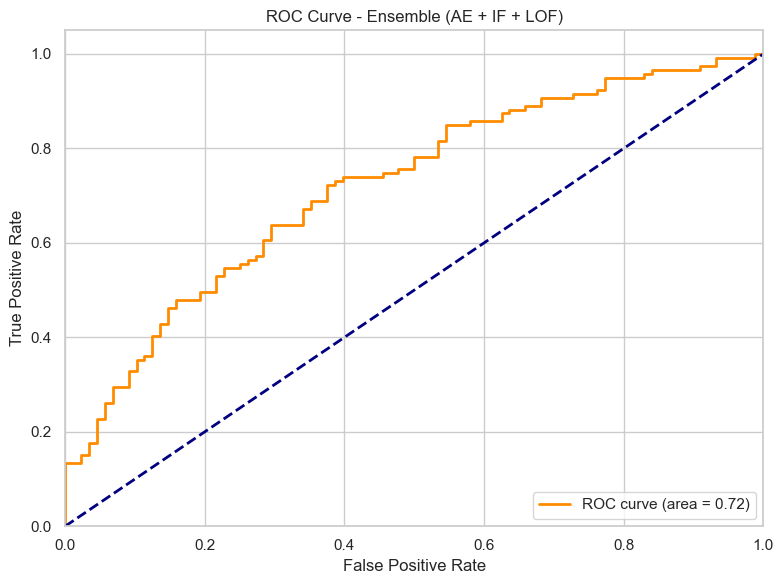

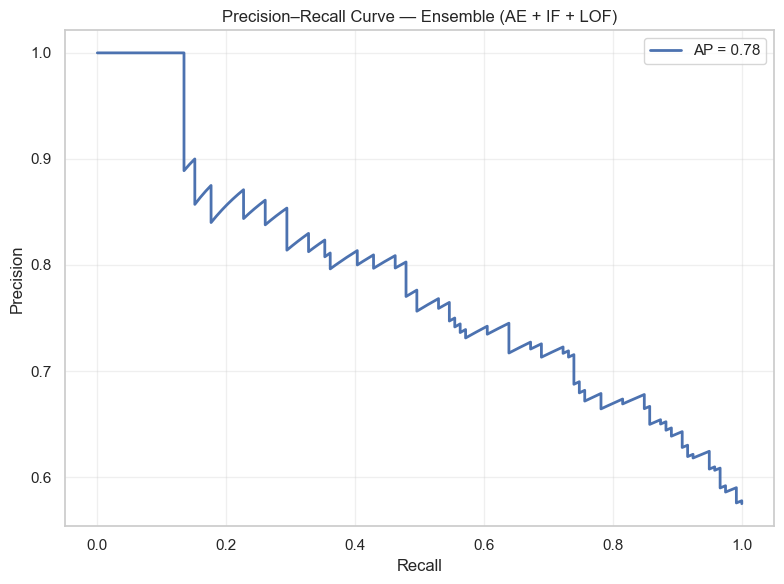

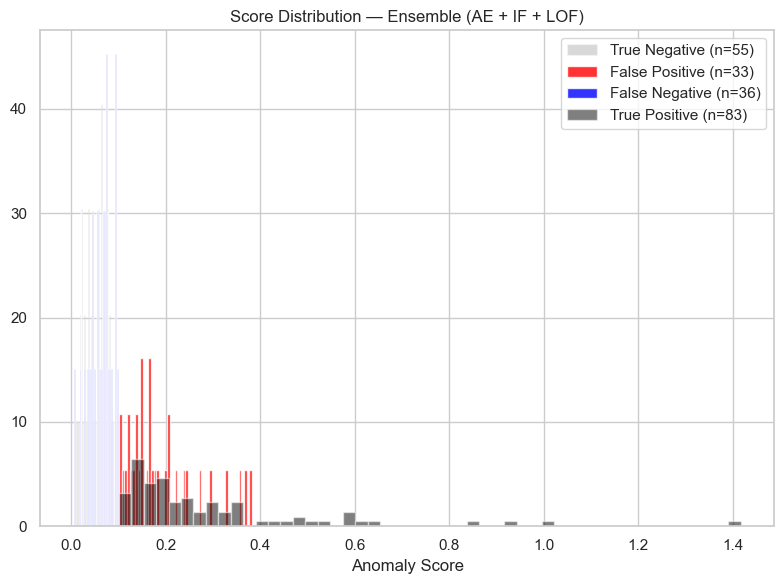

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


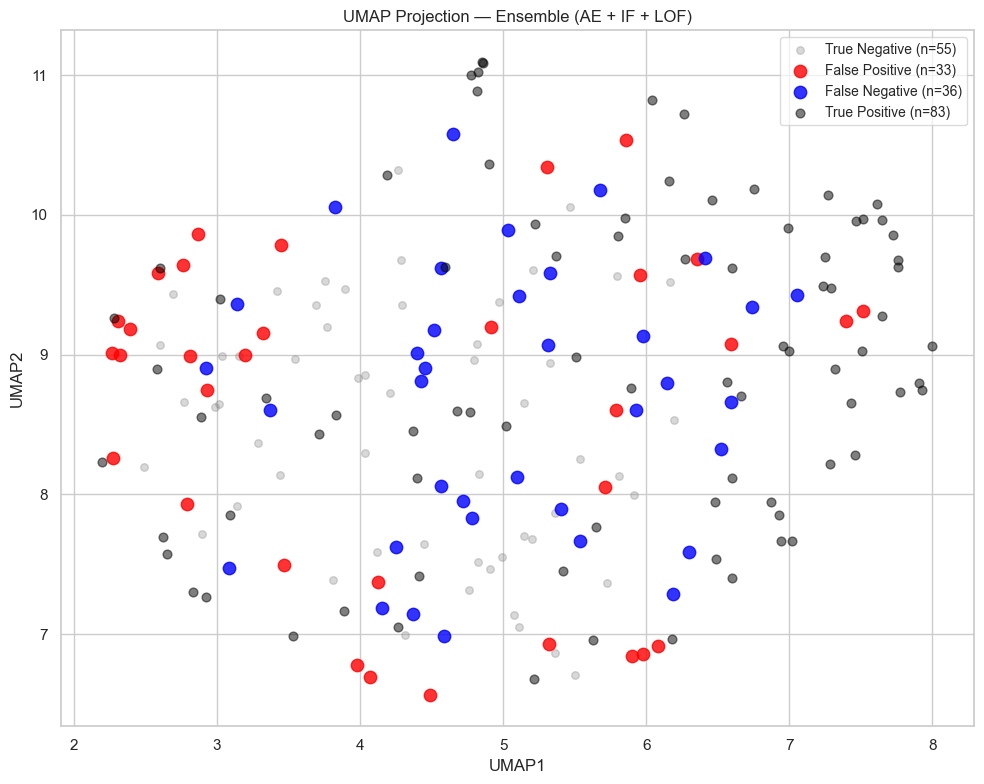

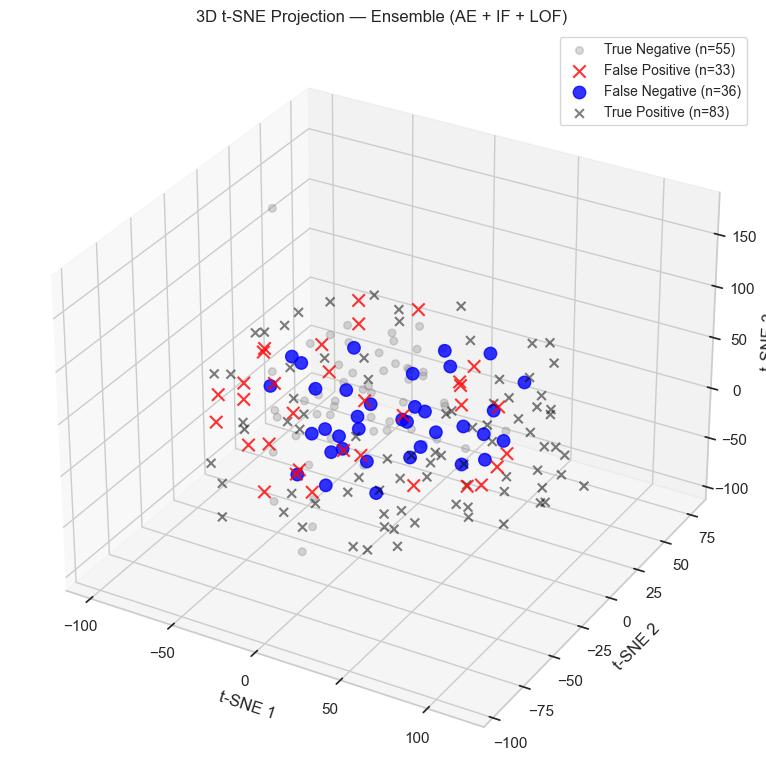

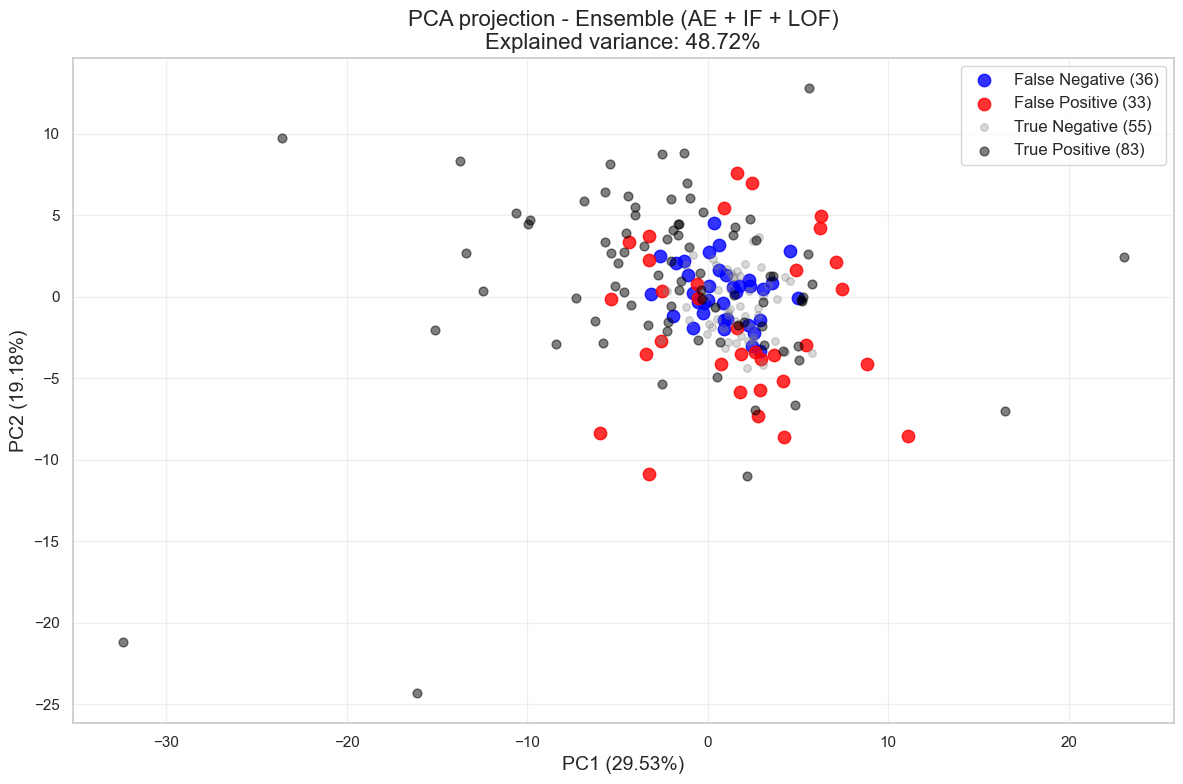

In [23]:
# ----------------------------------------------------------------------
# 5) ‑‑‑ Evaluation & visualisation ------------------------------------
# ----------------------------------------------------------------------
precision, recall, f1 = evaluate_model(
    y_true = y_test,
    y_pred = y_test_pred,
    y_score= ensemble_test_scores,
    model_name='Ensemble (AE + IF + LOF)')

visualize_pca(
    X        = X_test,
    y_true   = y_test,
    y_pred   = y_test_pred,
    model_name='Ensemble (AE + IF + LOF)')

results.append({
    'Model':'Ensemble',
    'Precision':precision,
    'Recall':   recall,
    'F1':       f1})
